<a href="https://colab.research.google.com/github/BelleFreitas/redes_complexas/blob/main/redescomplexas_SIR_SIS_NovoModelo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alguns modelos de Redes Complexas com foco em processos epidêmicos

Criando funções que serão utilizadas para a construção e interpretação de uma rede. 

In [1]:
## Criando uma função para calcular o grau (k) e sua probabilidade de ocorrência com base na frequência (distribuição de grau)
def distribuicao_grau(GER):
    valores_k = dict(GER.degree()) # criando um dicionário (lista) que identifica cada nó (identificador: valor, ..., identificador: valor); 
                                   # não sabemos a posição 
    valores_k = list(valores_k.values()) # pegando apenas os valores do grau (do dicionário criado acima)
    max_k = np.max(valores_k) # maior grau da rede
    min_k = np.min(min) # menor grau da rede
    vetor_valores_k = arange(0, max_k+1) # vetor com os possíveis valores de k (lembrando que é "aberto" na direita, não inclui o último elemento, 
                                         # por isso "max_k + 1")
    P_k = np.zeros(max_k+1) # P(k): vetor vazio (com zeros) com tamanho do maior grau da rede
    for k in valores_k: # loop para calcular a frequência de cada grau 
        P_k[k] = P_k[k] + 1
    P_k = P_k/sum(P_k) # P_k = frequência de determinado grau dividido pela soma das frequências de cada grau
                       # Obs.: a soma dos elementos de P(k) deve ser igual a 1
    # Mostrando as saídas da função:
    print('Vetor com os possíveis valores de "k":', vetor_valores_k) 
    print('Probabilidade de cada grau "k" ocorrer:', P_k)
    return vetor_valores_k, P_k

In [2]:
## Criando uma função genérica para calcular o momento da distribuição de grau
## Obs.: A intenção é utilizar essa função para o cálculo do segundo momento 
def momento_distribuicao_grau(G,m):
    grau_k, P_k = distribuicao_grau(G)
    momento = sum((grau_k**m)*P_k) # segundo momento = grau do nó ao quadrado (m = 2) vezes a probabilidade de ocorrência daquele grau
    return momento

In [3]:
## Função para calcular a entropia de Shannon, ou seja, a dispersão da rede 
def entropia_shannon(G):
    grau_k, P_k = distribuicao_grau(G)
    H = 0 # iniciando a variável H (entropia de Shannon)
    for probs_k in P_k:
        if(probs_k > 0): # se a probabilidade do grau k ocorrer for maior do que zero, então é realizada a equação abaixo:
            H = H - probs_k*math.log(probs_k, 2) # H = resultado da iteração anterior - probabilidade do grau k (Pk) vezes o log dessa probabilidade 
                                                 # na iteração atual
    return H

In [4]:
## Função para encontrar a posição de um elemento em um vetor
def encontrar_posicao(v, i): # sendo "v" um vetor qualquer e "i" o índice da posição
    lista_posicao = [] # criando uma lista vazia, na qual serão agregados os valores da posição de cada elemento
    pos = 0 # iniciando a variável posição ("pos") em zero
    for x in v: # loop para encontrar as posições e acrescentar na lista "lista_posicao" os valores encontrados
        if(x == i): # "x" assume os valores do vetor
            lista_posicao.append(pos) # a função .append adiciona o valor na lista "lista_posicao"
        pos = pos + 1
    return lista_posicao

Importando as bibliotecas necessárias.

In [5]:
## Importanto a biblioteca numpy para trabalhar com vetores
from numpy import *
import numpy as np

## Importando a biblioteca matplotlib para plotar os resultados (gráficos)
import matplotlib.pyplot as plt

## Importando a biblioteca pandas para aplicação em data frame
import pandas as pd

## Importamos a biblioteca networkx para processar redes 
## Obs.: Essa biblioteca pode ser instalada seguindo as etapas neste link: https://networkx.github.io/documentation/latest/install.html, 
## em que todos os comandos dessa biblioteca são prefixados por "nx."
import networkx as nx

## Importanto a biblioteca scipy.stats para aplicar as funções estatísticas
from scipy.stats import binom

# 1. Grafos aleatórios - modelos ER e WS

## 1.1 Modelo Erdős-Rényi (ER)

Vamos começar com o grafo aleatório Erdős-Rényi. Esse grafo é composto por $N$ nós e cada conexão entre pares de nós é estabelecida de acordo com a probabilidade $p$, sendo um caso típico de um processo de Bernoulli.

In [6]:
## Definimos:
N = 500 # número de nós da rede
grau_medio = 8 # grau médio da rede
p = grau_medio/(N-1) # probabilidade de dois nós estarem conectados
print('Probabilidade de cada conexão entre pares de nós:', p)

## Gerando a rede aleatória ER com a biblioteca networkx
GER = nx.gnp_random_graph(N, p, seed=12, directed=False) # rede aleatória não direcionada com fixação de semente (reprodutibilidade)

Probabilidade de cada conexão entre pares de nós: 0.01603206412825651


In [7]:
## Mostrando informações básicas sobre a rede gerada
N = len(GER) # número de nós da rede aleatória GER
M = GER.number_of_edges() # número de links (arestas) entre dois nós

## Obs.: Podemos notar que o grau médio da rede gerada não é exatamente igual ao grau médio de entrada, pois esse é o número esperado de conexões
print('Número de nós:', N)
print('Número de links:', M)
print('Grau médio:', 2*M/N)

Número de nós: 500
Número de links: 1918
Grau médio: 7.672


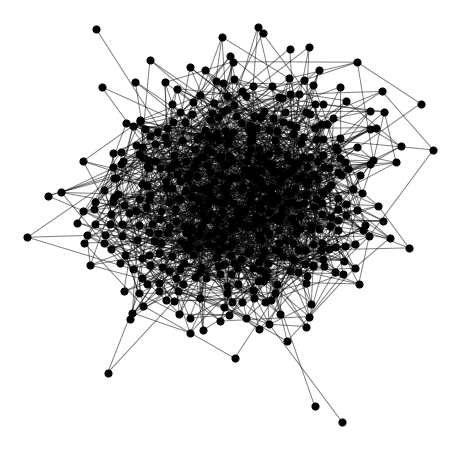

In [8]:
## Construção da rede ER usando a biblioteca networkx
pos = nx.fruchterman_reingold_layout(GER); # posições dos nós a partir do algoritmo de força Fruchterman-Reingold
plt.figure(figsize=(8,8)); # definindo o tamanho da figura
plt.axis("off"); # sem os eixos/bordas
nx.draw_networkx_nodes(GER, pos, node_size=50, node_color="black");
nx.draw_networkx_edges(GER, pos, alpha=0.500); # alpha = cor (em tons de cinza) dos links; quanto mais próximo de 1, mais escuro
# nx.draw_networkx_labels(GER, pos, font_color="white"); # função que coloca a numeração dentro dos nós (recomendado para poucos nós)
plt.show();

In [9]:
## Calculando a distribuição do grau da rede ER gerada
vetor_grau_k, P_k = distribuicao_grau(GER)

Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Probabilidade de cada grau "k" ocorrer: [0.    0.006 0.012 0.024 0.08  0.112 0.122 0.128 0.136 0.122 0.104 0.072
 0.05  0.014 0.01  0.006 0.002]


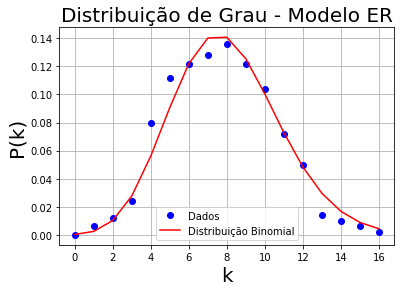

In [10]:
## Construção do gráfico da distrubuição de grau
plt.figure() # criando a figura 
plt.plot(vetor_grau_k, P_k, 'bo', label='Dados') # x = ks = possíveis valores de k (grau), y = Pk = probabilidade de ocorrência de cada grau k, 
                                                 # 'bo' = círculos azuis, label = 'Dados' = legenda dos círculos azuis
plt.xlabel("k", fontsize=20) # legenda do eixo x
plt.ylabel("P(k)", fontsize=20) # legenda do eixo y
plt.title("Distribuição de Grau - Modelo ER", fontsize=20) # título do gráfico
plt.grid(True) # "grades cinzas" do fundo (melhor visualização)
plt.savefig('degree_dist.eps') # salvando a figura em um arquivo

## Montando a distribuição binomial utilizando a biblioteca scipy.stats (import binom)
## Obs.: A distribuição do grau, em uma rede aleatória Erdos-Renyi, segue uma distribuição binomial
pk = binom.pmf(vetor_grau_k, N, p) # .pmf calcula a função densidade da binomial
plt.plot(vetor_grau_k, pk, 'r', label='Distribuição Binomial')
plt.legend()
plt.savefig('distribuicao_grau_erdos.png') # salvanda a figura
plt.show(True) # essa linha não é necessária (só se for uma função que criamos)

In [11]:
## Calculando o segundo momento da distribuição de grau
k2 = momento_distribuicao_grau(GER,2)
print('Segundo momento de P(k):', k2)

Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Probabilidade de cada grau "k" ocorrer: [0.    0.006 0.012 0.024 0.08  0.112 0.122 0.128 0.136 0.122 0.104 0.072
 0.05  0.014 0.01  0.006 0.002]
Segundo momento de P(k): 66.1


In [12]:
## Calculando a entropia de Shannon de P(k)
H = entropia_shannon(GER)
print("Entropia de Shannon = ", "%3.4f"%H) # "%3.4f%"% - uma maneira de fazer o print com 4 casas decimais

Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Probabilidade de cada grau "k" ocorrer: [0.    0.006 0.012 0.024 0.08  0.112 0.122 0.128 0.136 0.122 0.104 0.072
 0.05  0.014 0.01  0.006 0.002]
Entropia de Shannon =  3.4507


In [13]:
## O coeficiente de clustering (agrupamento) de uma rede aleatória é igual a "p"
coef_clust_medio = nx.average_clustering(GER) # calculando o clustering médio da rede GER
print("Clustering médio:", "%3.4f"%coef_clust_medio, '| p = ', p)

Clustering médio: 0.0097 | p =  0.01603206412825651


## 1.2 Modelo Watts-Strogatz (WS) - Small World

In [14]:
## Definimos:
N = 500 # número de nós da rede
grau_medio = 8 # grau médio da rede
k = int(grau_medio/2) # cada nó é unido com k vizinhos ??????
p = 1 # probabilidade de realocar um nó existente. Como p = 1, todos os nós serão reconectados

## Gerando a rede aleatória WS com a biblioteca networkx
GWS = nx.watts_strogatz_graph(N, k, p, seed=123) # rede aleatória não direcionada com fixação de semente (reprodutibilidade)

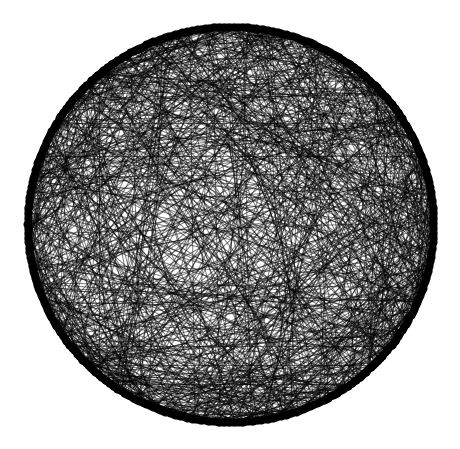

In [15]:
## Construção da rede WS usando a biblioteca networkx
pos = nx.circular_layout(GWS); # posições dos nós de forma circular
plt.figure(figsize=(8,8)); # definindo o tamanho da figura
plt.axis("off"); # sem os eixos/bordas
nx.draw_networkx_nodes(GWS, pos, node_size=50, node_color="black");
nx.draw_networkx_edges(GWS, pos, alpha=0.500);
# nx.draw_networkx_labels(GWS, pos, font_color="white"); # função que coloca a numeração dentro dos nós (recomendado para poucos nós)
plt.show();

In [16]:
## Calculando a distribuição do grau da rede WS gerada
vetor_grau_k, P_k = distribuicao_grau(GWS) 

Vetor com os possíveis valores de "k": [0 1 2 3 4 5 6 7 8 9]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.116 0.296 0.258 0.188 0.104 0.024 0.01  0.004]


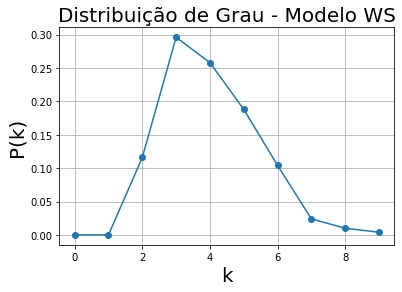

In [17]:
## Construção do gráfico da distribuição de grau
plt.figure() # criando a figura 
plt.plot(vetor_grau_k, P_k, 'o-', label='Dados') # x = ks = possíveis valores de k (grau), y = Pk = probabilidade de ocorrência de cada grau k, 
                                                 # 'o-' = círculos azuis, _label = 'Dados' = legenda dos círculos azuis
plt.xlabel("k", fontsize=20) # legenda do eixo x
plt.ylabel("P(k)", fontsize=20) # legenda do eixo y
plt.title("Distribuição de Grau - Modelo WS", fontsize=20) # título do gráfico
plt.grid(True) # "grades cinzas" do fundo (melhor visualização)
plt.savefig("distribuicao_grau_ws.png") # salvando a imagem
plt.show()

In [18]:
## Calculando o segundo momento da distribuição do grau 
k2 = momento_distribuicao_grau(GWS,2)
print('Segundo momento de P(k):', k2)

Vetor com os possíveis valores de "k": [0 1 2 3 4 5 6 7 8 9]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.116 0.296 0.258 0.188 0.104 0.024 0.01  0.004]
Segundo momento de P(k): 17.84


In [19]:
## Calculando a entropia de Shannon
H = entropia_shannon(GWS)
print("Shannon Entropy = ", "%3.4f"%H) # "%3.4f%"% - uma maneira de fazer o print com 4 casas decimais

Vetor com os possíveis valores de "k": [0 1 2 3 4 5 6 7 8 9]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.116 0.296 0.258 0.188 0.104 0.024 0.01  0.004]
Shannon Entropy =  2.4050


In [20]:
## O coeficiente de clustering (agrupamento) de uma rede aleatória é igual a "p"
coef_clust_medio = nx.average_clustering(GWS) # calculando o clustering médio da rede GWS
print("Clustering médio:", "%3.4f"%coef_clust_medio, '| p = ', p)

Clustering médio: 0.0060 | p =  1


# 2. Modelo livre de escala: modelo Barabási-Albert (BA)

In [21]:
## Definimos:
N = 500 # número de nós da rede
grau_medio = 8 # grau médio da rede
m = int(grau_medio/2) # número de links que desejamos na rede

## Gerando a rede livre de escala BA com a biblioteca networkx
GBA = nx.barabasi_albert_graph(N, m, seed = 123) # gerando a rede com fixação de semente

In [22]:
## Mostrando as informações básicas sobre a rede gerada
N = len(GBA) # número de nós
M = GBA.number_of_edges() # número de links
print('Número de Nós:', N)
print('Número de links:', M)
print('Grau médio:', 2*M/N)

Número de Nós: 500
Número de links: 1984
Grau médio: 7.936


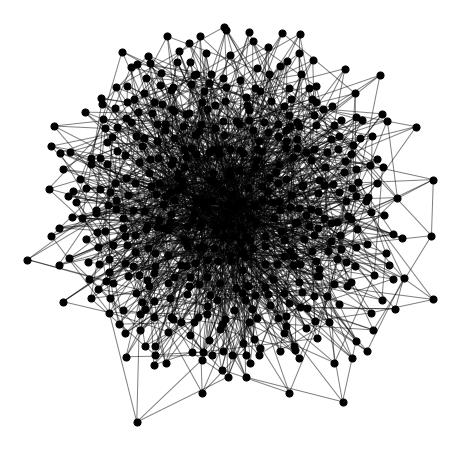

In [23]:
## Construção da rede WS usando a biblioteca networkx
pos = nx.fruchterman_reingold_layout(GBA); # posições dos nós a partir do algoritmo de força Fruchterman-Reingold
plt.figure(figsize=(8,8)); # definindo o tamanho da figura
plt.axis("off"); # sem eixo/borda
nx.draw_networkx_nodes(GBA, pos, node_size=50, node_color="black");
nx.draw_networkx_edges(GBA, pos, alpha=0.500);
# nx.draw_networkx_labels(GBA, pos, font_color="white"); # função que coloca a numeração dentro dos nós (recomendado para poucos nós)
plt.show();

Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.    0.    0.312 0.218 0.12  0.074 0.048 0.034 0.02  0.024
 0.02  0.032 0.016 0.01  0.004 0.006 0.006 0.006 0.004 0.002 0.004 0.004
 0.002 0.002 0.002 0.002 0.002 0.002 0.    0.004 0.002 0.    0.004 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.004 0.    0.002 0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.002 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.002]


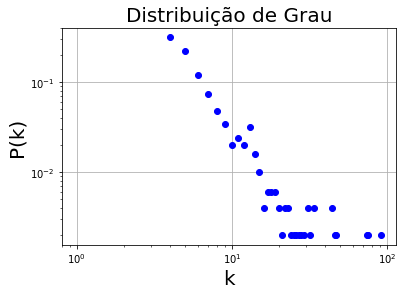

In [24]:
## Distribuição do grau da rede Barabási-Albert com a biblioteca matplotlib
## Obs.: Lembrando que esse modelo segue a lei de potências
vetor_grau_k, P_k = distribuicao_grau(GBA)
plt.figure()
plt.loglog(vetor_grau_k, P_k,'bo', basex=10, basey=10)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Distribuição de Grau", fontsize=20)
plt.grid(True)
plt.show(True)

# 3. Disseminação de epidemias com a rede Barabási-Albert

## 3.1 Modelo SIR

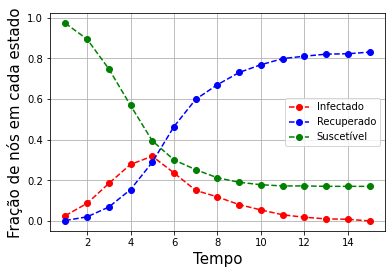

In [25]:
## Parâmetros epidêmicos
beta = 0.2 # probabilidade de um indivíduo (nó) ser infectado
mu = 0.5 # probabilidade do indivíduo infectado se recuperar

## Processo reativo: dinâmica SIR
no_semente = 0; # semente para reprodutibilidade
vetor_estados = np.zeros(N) # vetor que armazena o espaço de estados; iniciado em 0 (suscetível) - (0 = suscetível, 1 = infectado, 2 = recuperado)
vetor_estados[no_semente] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
num_infectados = 1 # numero de nós iniciais infectados
t = 0 # tempo (inicia-se com t = 0)
nos_infectados = list() # armazena os nós infectados 
vt = list() # armazena os tempos após cada rodada de infecção e recuperação
vrho = list() # armazena a fração de nós infectados em cada passo de tempo
vR = list() # armazena a fração de nós recuperados em cada passo de tempo
vS = list() # armazena a fração de nós suscetíveis em cada passo de tempo

## Modelo reativo
while num_infectados > 0: # simula enquanto ainda existem nós infectados 
  nos_infectados = encontrar_posicao(vetor_estados,1) # lista com o a posição dos nós infectados
  for i in nos_infectados: # esse primeiro loop identifica quem são os nós vizinhos dos nós infectados
    vizinhos_s = GBA.neighbors(i) # para cada nó infectado, temos que os seus vizinhos serão expostos a doença (suscetíveis), 
                                  # sendo armazenados na lista vizinhos_s 
    for j in vizinhos_s: # esse loop é realizado em cada vizinho dos nós infectados, tentando infectá-los 
      if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                  # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
        if vetor_estados[j] != 2: # antes é verificado se o nó já está recuparado, isto é, ele não pode ser infectado novamente
          vetor_estados[j] = 1 # se o nó não for recuperado, ele é infectado
  for k in nos_infectados: # esse loop indentifica os nós que estavam infectados e transmitiram a doença para seus vizinhos, tentando recuperá-los 
                           # com probabilidade mu
    if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
      vetor_estados[k] = 2 # o indivíduo passa para o estado de recuperado (2)
  
  ## Após a infecção e a recuperação, são calculados alguns valores:
  num_infectados = len(encontrar_posicao(vetor_estados,1)) # número de nós infectados
  vrho.append(num_infectados/N) # fração de nós infectados
  vR.append(len(encontrar_posicao(vetor_estados,2))/N) # fração de nós recuperados 
  vS.append(len(encontrar_posicao(vetor_estados,0))/N) # fracao de nós suscetíveis
  t = t + 1 # acrescenta-se uma unidade de tempo
  vt.append(t)
    

## Gráfico da simulação realizada    
plt.figure()
plt.plot(vt, vrho, 'ro--', label='Infectado')
plt.plot(vt, vR, 'bo--', label='Recuperado')
plt.plot(vt, vS, 'go--', label='Suscetível')
plt.xlabel("Tempo", fontsize=15)
plt.ylabel("Fração de nós em cada estado", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

Simulação do modelo SIR a partir de $N$ nós, calculando a fração média de nós infectados.

In [26]:
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
vlambda = list()
v_vrho = list()
for lbd in arange(0,1,0.05):
    beta = lbd*mu
    Tmax = 20 #maximum number of steps
    av_rho = np.zeros(Tmax)
    for seed_node in GBA.nodes():
        vector_states = np.zeros(N) # vector that stores the states of the vertices
        vector_states[seed_node] = 1 # vector that stores the states
        ninfected = 1
        t = 0 # start in t= 0 
        infected = list() # Stores the number of infected nodes at each time step
        vrho = list()
        # Reactive model
        for t in arange(0,Tmax):
            infected = encontrar_posicao(vector_states,1) # list of infected nodes
            for i in infected: # try to infect the neighbors
                neigs = GBA.neighbors(i)
                for j in neigs:
                   if np.random.rand() < beta:
                        if(vector_states[j] != 2): # verify if the node is not recovered
                            vector_states[j] = 1
            for k in infected: # try to recover the infected nodes
                if np.random.rand() < mu:
                    vector_states[k] = 2
            ninfected = len(encontrar_posicao(vector_states,1))
            vrho.append(ninfected/N)
        for x in arange(0, len(vrho)):
            av_rho[x] = av_rho[x] + vrho[x]
    av_rho = av_rho/len(GBA.nodes()) # calcula-se o número médio de nós infectados, iniciando-se em diferentes nós
    vlambda.append(lbd)
    v_vrho.append(mean(av_rho))

Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.    0.    0.312 0.218 0.12  0.074 0.048 0.034 0.02  0.024
 0.02  0.032 0.016 0.01  0.004 0.006 0.006 0.006 0.004 0.002 0.004 0.004
 0.002 0.002 0.002 0.002 0.002 0.002 0.    0.004 0.002 0.    0.004 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.004 0.    0.002 0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.002 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.002]
Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 

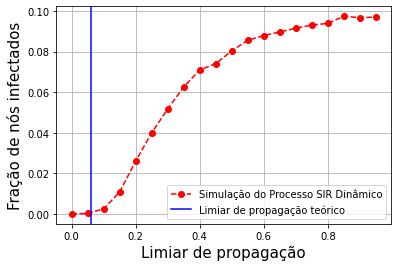

In [27]:
plt.figure()
plt.plot(vlambda, v_vrho, 'ro--', label='Simulação do Processo SIR Dinâmico')
plt.xlabel("Limiar de propagação", fontsize=15)
plt.ylabel("Fração de nós infectados", fontsize=15)
lambda_c = momento_distribuicao_grau(GBA,1)/momento_distribuicao_grau(GBA,2)
plt.axvline(lambda_c, color = 'b', label='Limiar de propagação teórico')
plt.legend()
plt.grid(True)
plt.show(True) 

## 3.2 Modelo SIS

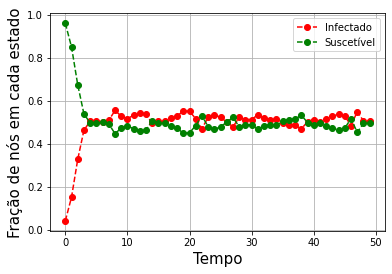

In [28]:
## Parâmetros epidêmicos
beta = 0.2 # probabilidade de um indivíduo (nó) ser infectado
mu = 0.5 # probabilidade do indivíduo infectado se recuperar

## Processo reativo: dinâmica SIS
seed_node = 0; # semente para reprodutibilidade
vector_states = np.zeros(N) # vetor que armazena os estados dos nós (0 = suscetivel, 1 = infectado)
vector_states[seed_node] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
ninfected = 1 # numero de nós iniciais infectados
infected = list() # vetor que armazena a posição de nós, indicando os que estão infectados
vt = list() # armazena os tempos da simulação
vrho = list() # armazena a fração de nós infectados em cada espaço de tempo
vS = list() # armazena a fração de nós suscetíveis em cada espaço de tempo
Tmax = 50 # número máximo de simulações que serão realizadas

## Modelo reativo
for t in arange(0, Tmax): # as simulações, agora, irão ocorrer até o tempo t = Tmax
    infected = encontrar_posicao(vector_states,1) # lista indicando a posição dos vetores infectados
    for i in infected: # loop para localização dos vizinhos dos nós infectados
        neigs = GBA.neighbors(i) # neighs identifica a posição dos vizinhos dos nós infectados que serão expostos a doença
        for j in neigs: # loop para infecção dos vizinhos dos nós infectados
            if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                        # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
                vector_states[j] = 1 # os nós infectados agora possuem estado = 1
    for k in infected: # loop para recuperação dos nós que disseminaram a doença no passo anterior
        if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
            vector_states[k] = 0 # o nó infectado é recuperado e volta a ser suscetível (0)
            
    ## Após a infecção e a recuperação, são calculados alguns valores:
    ninfected = len(encontrar_posicao(vector_states,1)) # número de nós infectados
    vrho.append(ninfected/N) # fração de nós infectados
    vS.append(len(encontrar_posicao(vector_states,0))/N) # fração de nós suscetíveis
    vt.append(t)
  
## Gráfico da simulação
plt.figure()
plt.plot(vt, vrho, 'ro--', label='Infectado')
plt.plot(vt, vS, 'go--', label='Suscetível')
plt.xlabel("Tempo", fontsize=15)
plt.ylabel("Fração de nós em cada estado", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

Simulação Modelo SIS à partir de $N$ nós, calculando a fração média de nós infectados.

In [29]:
def SIS(G, mu=1, Tmax = 20):    
    def find(v, i): # function to find the positions of an element in a vetor
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIR dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
        print(lbd, mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
    return vlbda, rhoI

In [30]:
lbda, rho  = SIS(GBA)

0.0 0.0
0.05 0.0
0.1 0.016297999999999997
0.15000000000000002 0.09425300000000003
0.2 0.18496000000000015
0.25 0.25791999999999965
0.30000000000000004 0.3171640000000001
0.35000000000000003 0.36993299999999935
0.4 0.4026849999999993
0.45 0.433112999999999
0.5 0.4544469999999995
0.55 0.4618659999999995
0.6000000000000001 0.4772899999999999
0.65 0.4816029999999998
0.7000000000000001 0.49046899999999993
0.75 0.49519099999999994
0.8 0.49722399999999967
0.8500000000000001 0.49858500000000006
0.9 0.49944100000000013
0.9500000000000001 0.4997600000000001


Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
Probabilidade de cada grau "k" ocorrer: [0.    0.    0.    0.    0.312 0.218 0.12  0.074 0.048 0.034 0.02  0.024
 0.02  0.032 0.016 0.01  0.004 0.006 0.006 0.006 0.004 0.002 0.004 0.004
 0.002 0.002 0.002 0.002 0.002 0.002 0.    0.004 0.002 0.    0.004 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.004 0.    0.002 0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.002 0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.002]
Vetor com os possíveis valores de "k": [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 

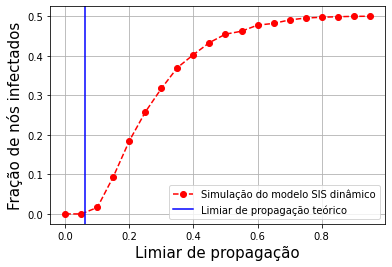

In [31]:
plt.figure()
plt.plot(lbda, rho, 'ro--', label='Simulação do modelo SIS dinâmico')
plt.xlabel("Limiar de propagação", fontsize=15)
plt.ylabel("Fração de nós infectados", fontsize=15)
lambda_c = momento_distribuicao_grau(GBA,1)/momento_distribuicao_grau(GBA,2)
plt.axvline(lambda_c, color = 'b', label='Limiar de propagação teórico')
plt.legend()
plt.grid(True)
plt.show(True)

## Gráfico de comportamento de $\beta$ proposto

$\beta = 0.5 \times \{ sin(\omega \times t + \alpha) + 1 \}$, onde $ 0 \leq \beta \leq 1 \in \mathbb{R} $

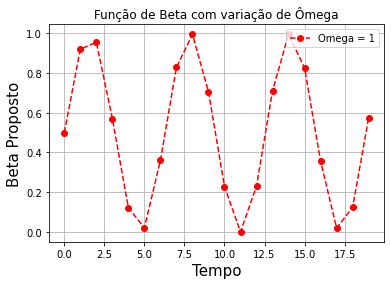

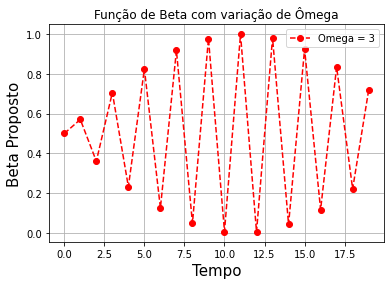

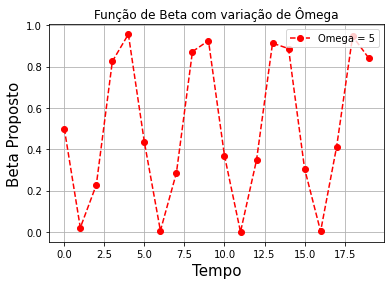

In [32]:
alpha = 0
Tmax = 20

for omega in [1,3,5]:
  betas = []
  vt = []
  for t in np.arange(0,Tmax):
    beta = 0.5* (sin(omega*t + alpha) + 1)
    betas.append(beta)
    vt.append(t)
  plt.figure()
  plt.plot(vt, betas, 'ro--', label="Omega = " + str(round(omega,2)), )
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Beta Proposto", fontsize=15)
  plt.title("Função de Beta com variação de Ômega")
  plt.legend(loc = 1)
  plt.grid(True)
  plt.show(True)

## Modelo SIR Proposto com rede Barabasi-Albert

Simulação do modelo dinâmico SIR proposto 

$\beta = 0.5 \times \{ sin(\omega \times t + \alpha) + 1 \}$, onde $ 0 \leq \beta \leq 1 \in \mathbb{R} $, $t > 0 \in \mathbb{N}$


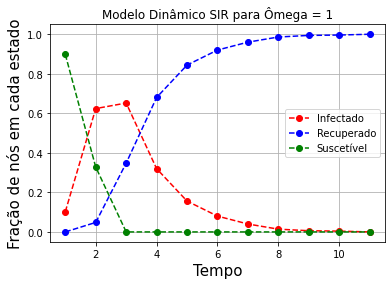

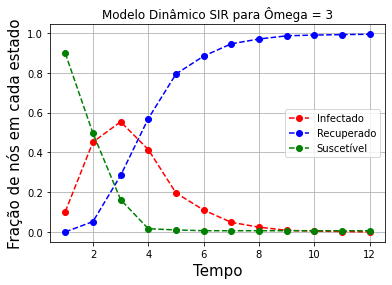

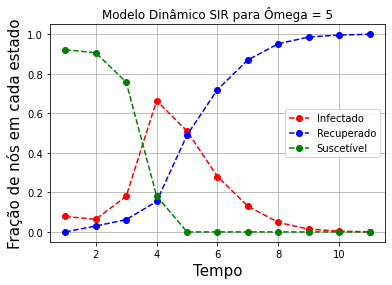

In [33]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:
  ## Processo reativo: dinâmica SIR Proposto
  no_semente = 0; # semente para reprodutibilidade
  vetor_estados = np.zeros(N) # vetor que armazena o espaço de estados; iniciado em 0 (suscetível) - (0 = suscetível, 1 = infectado, 2 = recuperado)
  vetor_estados[no_semente] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  num_infectados = 1 # numero de nós iniciais infectados
  t = 0 # tempo (inicia-se com t = 0)
  nos_infectados = list() # armazena os nós infectados 
  vt = list() # armazena os tempos após cada rodada de infecção e recuperação
  vrho = list() # armazena a fração de nós infectados em cada passo de tempo
  vR = list() # armazena a fração de nós recuperados em cada passo de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada passo de tempo

  ## Modelo reativo
  while num_infectados > 0: # simula enquanto ainda existem nós infectados 
    # beta iterativo que se altera ao longo do processo
    beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
    nos_infectados = encontrar_posicao(vetor_estados,1) # lista com o a posição dos nós infectados
    for i in nos_infectados: # esse primeiro loop identifica quem são os nós vizinhos dos nós infectados
      vizinhos_s = GBA.neighbors(i) # para cada nó infectado, temos que os seus vizinhos serão expostos a doença (suscetíveis), 
                                    # sendo armazenados na lista vizinhos_s 
      for j in vizinhos_s: # esse loop é realizado em cada vizinho dos nós infectados, tentando infectá-los 
        if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                    # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
          if vetor_estados[j] != 2: # antes é verificado se o nó já está recuparado, isto é, ele não pode ser infectado novamente
            vetor_estados[j] = 1 # se o nó não for recuperado, ele é infectado
    for k in nos_infectados: # esse loop indentifica os nós que estavam infectados e transmitiram a doença para seus vizinhos, tentando recuperá-los 
                            # com probabilidade mu
      if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
        vetor_estados[k] = 2 # o indivíduo passa para o estado de recuperado (2)
    
    ## Após a infecção e a recuperação, são calculados alguns valores:
    num_infectados = len(encontrar_posicao(vetor_estados,1)) # número de nós infectados
    vrho.append(num_infectados/N) # fração de nós infectados
    vR.append(len(encontrar_posicao(vetor_estados,2))/N) # fração de nós recuperados 
    vS.append(len(encontrar_posicao(vetor_estados,0))/N) # fracao de nós suscetíveis
    t = t + 1 # acrescenta-se uma unidade de tempo
    vt.append(t)
  
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vR, 'bo--', label='Recuperado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIR para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)


## Modelo SIS Proposto com rede Barabasi-Albert

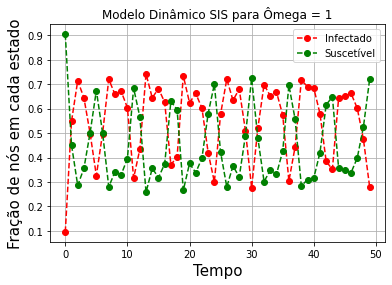

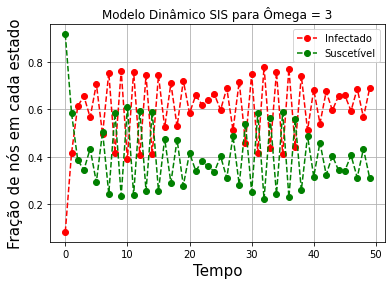

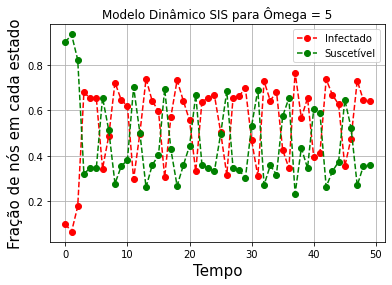

In [34]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:

  ## Processo reativo: dinâmica SIS
  seed_node = 0; # semente para reprodutibilidade
  vector_states = np.zeros(N) # vetor que armazena os estados dos nós (0 = suscetivel, 1 = infectado)
  vector_states[seed_node] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  ninfected = 1 # numero de nós iniciais infectados
  infected = list() # vetor que armazena a posição de nós, indicando os que estão infectados
  vt = list() # armazena os tempos da simulação
  vrho = list() # armazena a fração de nós infectados em cada espaço de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada espaço de tempo
  Tmax = 50 # número máximo de simulações que serão realizadas

  ## Modelo reativo
  for t in arange(0, Tmax): # as simulações, agora, irão ocorrer até o tempo t = Tmax
      beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
      infected = encontrar_posicao(vector_states,1) # lista indicando a posição dos vetores infectados
      for i in infected: # loop para localização dos vizinhos dos nós infectados
          neigs = GBA.neighbors(i) # neighs identifica a posição dos vizinhos dos nós infectados que serão expostos a doença
          for j in neigs: # loop para infecção dos vizinhos dos nós infectados
              if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                          # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
                  vector_states[j] = 1 # os nós infectados agora possuem estado = 1
      for k in infected: # loop para recuperação dos nós que disseminaram a doença no passo anterior
          if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
              vector_states[k] = 0 # o nó infectado é recuperado e volta a ser suscetível (0)
              
      ## Após a infecção e a recuperação, são calculados alguns valores:
      ninfected = len(encontrar_posicao(vector_states,1)) # número de nós infectados
      vrho.append(ninfected/N) # fração de nós infectados
      vS.append(len(encontrar_posicao(vector_states,0))/N) # fração de nós suscetíveis
      vt.append(t)
    
  ## Gráfico da simulação
  plt.figure()
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIS para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)

## Modelo SIR Proposto com rede Watts-Strogatz (WS) - Small World

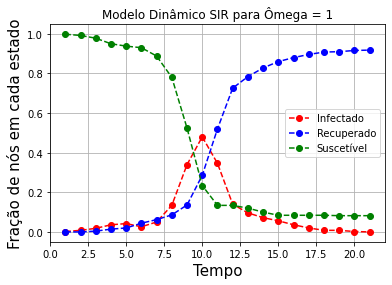

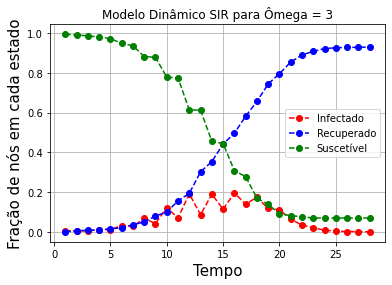

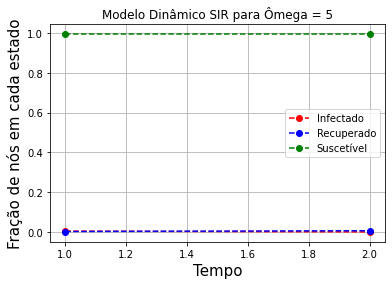

In [35]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:
  ## Processo reativo: dinâmica SIR Proposto
  no_semente = 0; # semente para reprodutibilidade
  vetor_estados = np.zeros(N) # vetor que armazena o espaço de estados; iniciado em 0 (suscetível) - (0 = suscetível, 1 = infectado, 2 = recuperado)
  vetor_estados[no_semente] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  num_infectados = 1 # numero de nós iniciais infectados
  t = 0 # tempo (inicia-se com t = 0)
  nos_infectados = list() # armazena os nós infectados 
  vt = list() # armazena os tempos após cada rodada de infecção e recuperação
  vrho = list() # armazena a fração de nós infectados em cada passo de tempo
  vR = list() # armazena a fração de nós recuperados em cada passo de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada passo de tempo

  ## Modelo reativo
  while num_infectados > 0: # simula enquanto ainda existem nós infectados 
    # beta iterativo que se altera ao longo do processo
    beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
    nos_infectados = encontrar_posicao(vetor_estados,1) # lista com o a posição dos nós infectados
    for i in nos_infectados: # esse primeiro loop identifica quem são os nós vizinhos dos nós infectados
      vizinhos_s = GWS.neighbors(i) # para cada nó infectado, temos que os seus vizinhos serão expostos a doença (suscetíveis), 
                                    # sendo armazenados na lista vizinhos_s 
      for j in vizinhos_s: # esse loop é realizado em cada vizinho dos nós infectados, tentando infectá-los 
        if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                    # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
          if vetor_estados[j] != 2: # antes é verificado se o nó já está recuparado, isto é, ele não pode ser infectado novamente
            vetor_estados[j] = 1 # se o nó não for recuperado, ele é infectado
    for k in nos_infectados: # esse loop indentifica os nós que estavam infectados e transmitiram a doença para seus vizinhos, tentando recuperá-los 
                            # com probabilidade mu
      if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
        vetor_estados[k] = 2 # o indivíduo passa para o estado de recuperado (2)
    
    ## Após a infecção e a recuperação, são calculados alguns valores:
    num_infectados = len(encontrar_posicao(vetor_estados,1)) # número de nós infectados
    vrho.append(num_infectados/N) # fração de nós infectados
    vR.append(len(encontrar_posicao(vetor_estados,2))/N) # fração de nós recuperados 
    vS.append(len(encontrar_posicao(vetor_estados,0))/N) # fracao de nós suscetíveis
    t = t + 1 # acrescenta-se uma unidade de tempo
    vt.append(t)
  
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vR, 'bo--', label='Recuperado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIR para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)


## Modelo SIS Proposto com rede Watts-Strogatz (WS) - Small World

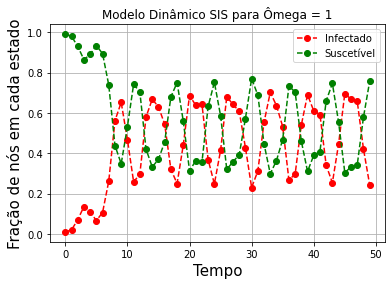

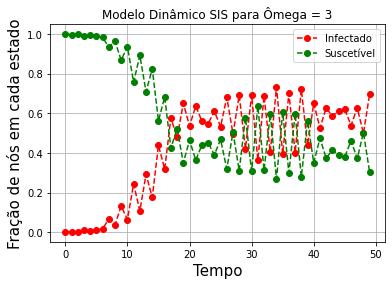

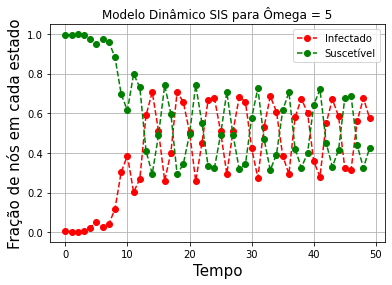

In [36]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:

  ## Processo reativo: dinâmica SIS
  seed_node = 0; # semente para reprodutibilidade
  vector_states = np.zeros(N) # vetor que armazena os estados dos nós (0 = suscetivel, 1 = infectado)
  vector_states[seed_node] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  ninfected = 1 # numero de nós iniciais infectados
  infected = list() # vetor que armazena a posição de nós, indicando os que estão infectados
  vt = list() # armazena os tempos da simulação
  vrho = list() # armazena a fração de nós infectados em cada espaço de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada espaço de tempo
  Tmax = 50 # número máximo de simulações que serão realizadas

  ## Modelo reativo
  for t in arange(0, Tmax): # as simulações, agora, irão ocorrer até o tempo t = Tmax
      beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
      infected = encontrar_posicao(vector_states,1) # lista indicando a posição dos vetores infectados
      for i in infected: # loop para localização dos vizinhos dos nós infectados
          neigs = GWS.neighbors(i) # neighs identifica a posição dos vizinhos dos nós infectados que serão expostos a doença
          for j in neigs: # loop para infecção dos vizinhos dos nós infectados
              if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                          # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
                  vector_states[j] = 1 # os nós infectados agora possuem estado = 1
      for k in infected: # loop para recuperação dos nós que disseminaram a doença no passo anterior
          if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
              vector_states[k] = 0 # o nó infectado é recuperado e volta a ser suscetível (0)
              
      ## Após a infecção e a recuperação, são calculados alguns valores:
      ninfected = len(encontrar_posicao(vector_states,1)) # número de nós infectados
      vrho.append(ninfected/N) # fração de nós infectados
      vS.append(len(encontrar_posicao(vector_states,0))/N) # fração de nós suscetíveis
      vt.append(t)
    
  ## Gráfico da simulação
  plt.figure()
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIS para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)

## Modelo SIR Proposto com rede Erdős-Rényi (ER)

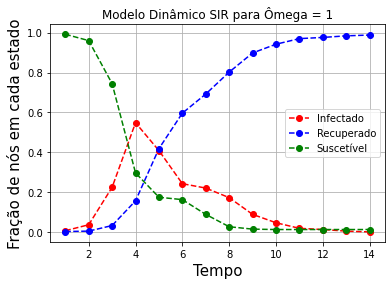

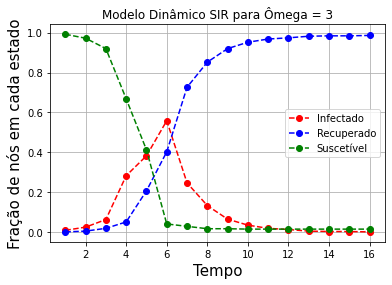

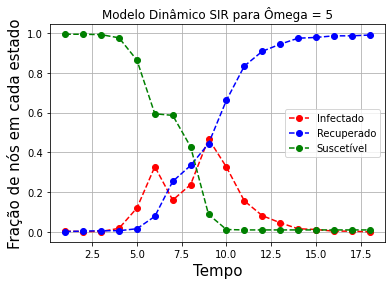

In [37]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:
  ## Processo reativo: dinâmica SIR Proposto
  no_semente = 0; # semente para reprodutibilidade
  vetor_estados = np.zeros(N) # vetor que armazena o espaço de estados; iniciado em 0 (suscetível) - (0 = suscetível, 1 = infectado, 2 = recuperado)
  vetor_estados[no_semente] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  num_infectados = 1 # numero de nós iniciais infectados
  t = 0 # tempo (inicia-se com t = 0)
  nos_infectados = list() # armazena os nós infectados 
  vt = list() # armazena os tempos após cada rodada de infecção e recuperação
  vrho = list() # armazena a fração de nós infectados em cada passo de tempo
  vR = list() # armazena a fração de nós recuperados em cada passo de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada passo de tempo

  ## Modelo reativo
  while num_infectados > 0: # simula enquanto ainda existem nós infectados 
    # beta iterativo que se altera ao longo do processo
    beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
    nos_infectados = encontrar_posicao(vetor_estados,1) # lista com o a posição dos nós infectados
    for i in nos_infectados: # esse primeiro loop identifica quem são os nós vizinhos dos nós infectados
      vizinhos_s = GER.neighbors(i) # para cada nó infectado, temos que os seus vizinhos serão expostos a doença (suscetíveis), 
                                    # sendo armazenados na lista vizinhos_s 
      for j in vizinhos_s: # esse loop é realizado em cada vizinho dos nós infectados, tentando infectá-los 
        if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                    # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
          if vetor_estados[j] != 2: # antes é verificado se o nó já está recuparado, isto é, ele não pode ser infectado novamente
            vetor_estados[j] = 1 # se o nó não for recuperado, ele é infectado
    for k in nos_infectados: # esse loop indentifica os nós que estavam infectados e transmitiram a doença para seus vizinhos, tentando recuperá-los 
                            # com probabilidade mu
      if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
        vetor_estados[k] = 2 # o indivíduo passa para o estado de recuperado (2)
    
    ## Após a infecção e a recuperação, são calculados alguns valores:
    num_infectados = len(encontrar_posicao(vetor_estados,1)) # número de nós infectados
    vrho.append(num_infectados/N) # fração de nós infectados
    vR.append(len(encontrar_posicao(vetor_estados,2))/N) # fração de nós recuperados 
    vS.append(len(encontrar_posicao(vetor_estados,0))/N) # fracao de nós suscetíveis
    t = t + 1 # acrescenta-se uma unidade de tempo
    vt.append(t)
  
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vR, 'bo--', label='Recuperado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIR para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)

## Modelo SIS Proposto com rede Erdős-Rényi (ER)


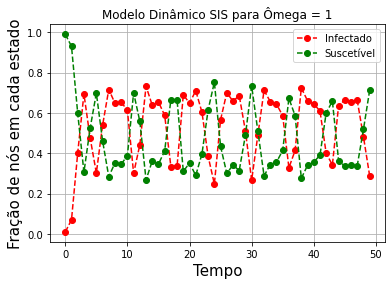

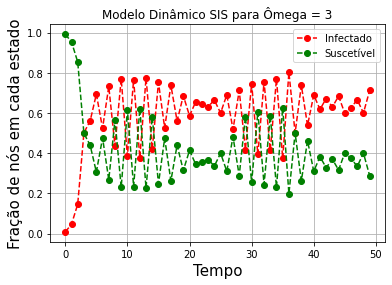

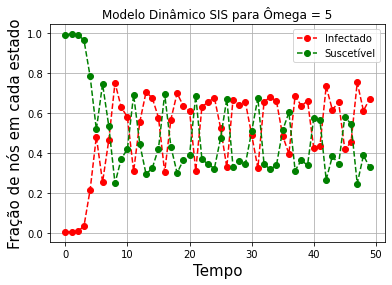

In [38]:
## Parâmetros epidêmicos
mu = 0.5 # probabilidade do indivíduo infectado se recuperar
alpha = 0

for omega in [1,3,5]:

  ## Processo reativo: dinâmica SIS
  seed_node = 0; # semente para reprodutibilidade
  vector_states = np.zeros(N) # vetor que armazena os estados dos nós (0 = suscetivel, 1 = infectado)
  vector_states[seed_node] = 1 # vetor que armazena o espaço de estados com o primeiro nó infectado (=1)
  ninfected = 1 # numero de nós iniciais infectados
  infected = list() # vetor que armazena a posição de nós, indicando os que estão infectados
  vt = list() # armazena os tempos da simulação
  vrho = list() # armazena a fração de nós infectados em cada espaço de tempo
  vS = list() # armazena a fração de nós suscetíveis em cada espaço de tempo
  Tmax = 50 # número máximo de simulações que serão realizadas

  ## Modelo reativo
  for t in arange(0, Tmax): # as simulações, agora, irão ocorrer até o tempo t = Tmax
      beta = 0.5*(sin(omega*t + alpha) + 1) # probabilidade de um indivíduo (nó) ser infectado
      infected = encontrar_posicao(vector_states,1) # lista indicando a posição dos vetores infectados
      for i in infected: # loop para localização dos vizinhos dos nós infectados
          neigs = GER.neighbors(i) # neighs identifica a posição dos vizinhos dos nós infectados que serão expostos a doença
          for j in neigs: # loop para infecção dos vizinhos dos nós infectados
              if np.random.rand() < beta: # é gerada uma probabilidade na qual será verificada se será maior do que a probabilidade de alguém ser infectado (beta); 
                                          # se isso ocorrer, o nó vizinho tem seu estado trocado para 1 (infectado)
                  vector_states[j] = 1 # os nós infectados agora possuem estado = 1
      for k in infected: # loop para recuperação dos nós que disseminaram a doença no passo anterior
          if np.random.rand() < mu: # gera-se uma probabilidade aleatória. Se esta for menor ou igual a mu, a pessoa é recuperada (2)
              vector_states[k] = 0 # o nó infectado é recuperado e volta a ser suscetível (0)
              
      ## Após a infecção e a recuperação, são calculados alguns valores:
      ninfected = len(encontrar_posicao(vector_states,1)) # número de nós infectados
      vrho.append(ninfected/N) # fração de nós infectados
      vS.append(len(encontrar_posicao(vector_states,0))/N) # fração de nós suscetíveis
      vt.append(t)
    
  ## Gráfico da simulação
  plt.figure()
  plt.plot(vt, vrho, 'ro--', label='Infectado')
  plt.plot(vt, vS, 'go--', label='Suscetível')
  plt.xlabel("Tempo", fontsize=15)
  plt.ylabel("Fração de nós em cada estado", fontsize=15)
  plt.title("Modelo Dinâmico SIS para Ômega = " + str(round(omega,2)))
  plt.legend()
  plt.grid(True)
  plt.show(True)